# Unprunned Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading dataset
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Separate the target variable and features
X = df.drop('target', axis=1)
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
unprunned_tree = DecisionTreeClassifier(criterion='gini')
unprunned_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = unprunned_tree.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8360655737704918
Confusion Matrix:
[[26  3]
 [ 7 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



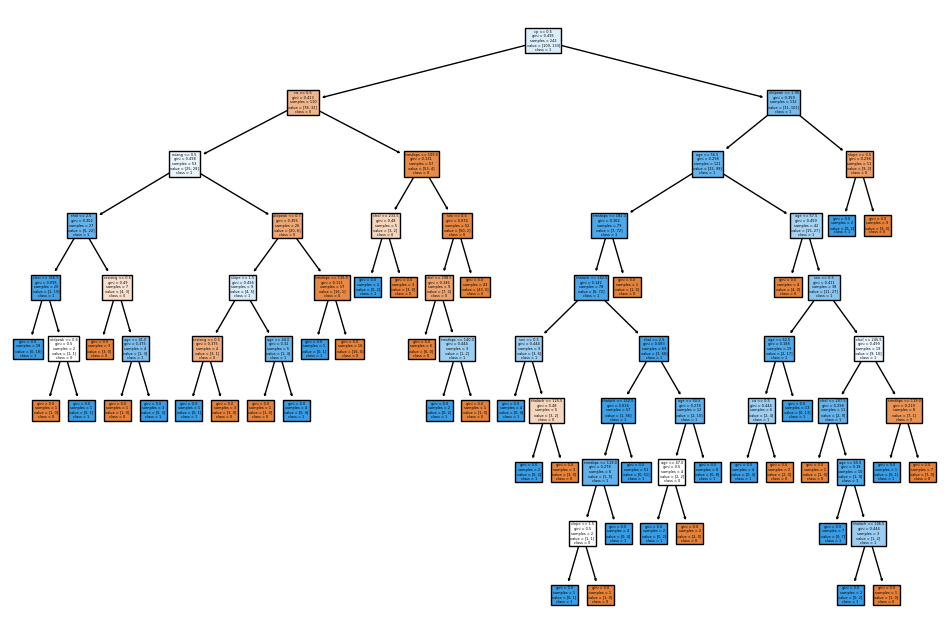

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(unprunned_tree, filled=True, feature_names=X.columns, class_names=list(map(str, unprunned_tree.classes_)))
plt.show()

# KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=79)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
from sklearn.metrics import confusion_matrix
#Accuray of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7049180327868853
[[14 15]
 [ 3 29]]


0.3770491803278688
0.36065573770491804
0.3442622950819672
0.32786885245901637
0.3114754098360656
0.2786885245901639
0.29508196721311475
0.3114754098360656
0.3114754098360656
0.29508196721311475
0.2459016393442623
0.26229508196721313
0.26229508196721313
0.26229508196721313
0.3114754098360656
0.2786885245901639
0.3114754098360656
0.3114754098360656
0.29508196721311475
0.3442622950819672
0.29508196721311475
0.2786885245901639
0.2786885245901639
0.2786885245901639
0.29508196721311475
0.2786885245901639
0.2786885245901639
0.29508196721311475
0.2786885245901639
0.26229508196721313
0.29508196721311475
0.29508196721311475
0.29508196721311475
0.29508196721311475
0.3114754098360656
0.2786885245901639
0.3114754098360656
0.3114754098360656
0.3114754098360656


Text(0, 0.5, 'Mean Error')

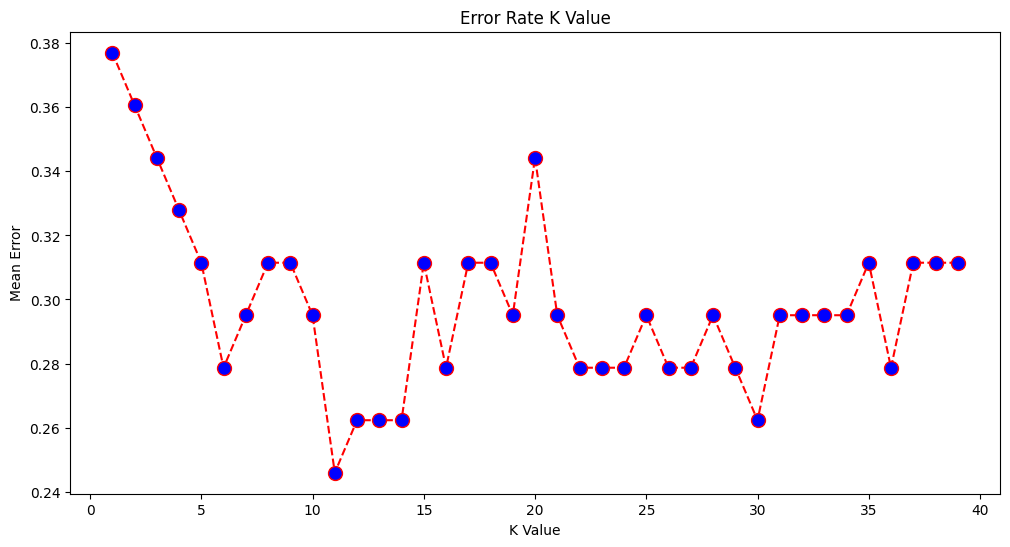

In [10]:
import numpy as np
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Pruuned Tree

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Loading dataset
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Separate the target variable and features
X = df.drop('target', axis=1)
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pruned_tree = DecisionTreeClassifier(max_depth=3)  # Set the max depth for pruning
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
y_pred = pruned_tree.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Pruned Tree: {accuracy}")

Accuracy with Pruned Tree: 0.819672131147541


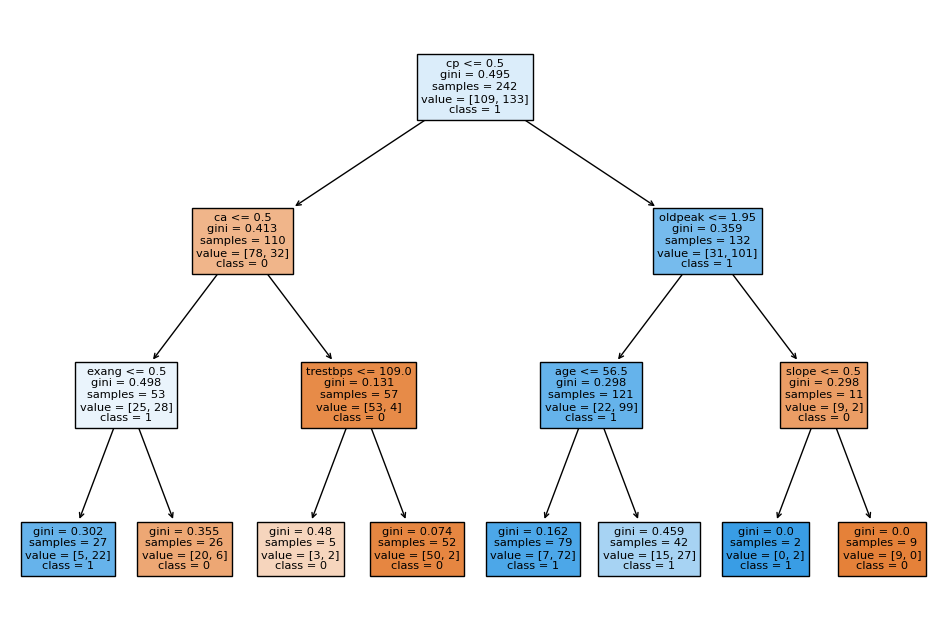

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=X.columns, class_names=list(map(str, pruned_tree.classes_)))
plt.show()

# Lab 06

# Averaging Method and Max Voting Method

In [19]:
#importlibrary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#import dataset
#from google.colab import files
#f=files.upload()

#read the dataframe
df=pd.read_csv("/kaggle/input/heartcsv/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#Defining feature and corresponding class label
x=df.drop("target",axis="columns")
y=df.target

#training set and testing set split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [21]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = tree.DecisionTreeClassifier()
# training all the model on the training dataset
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

#model score/accuracy
model_1.score(X_test,y_test)
model_2.score(X_test,y_test)
model_3.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8524590163934426

In [22]:
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(y_test, pred_final))

0.12568306010928962


In [23]:
from sklearn.metrics import log_loss
# Making the final model using voting classifier
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('lr', model_1), ('svm', model_2),('dt',model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

# printing log loss between actual and predicted value
print(log_loss(y_test, pred_final))

5.31791607380417


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Stacking Ensemble

In [24]:
from sklearn.datasets import load_iris
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

df=pd.read_csv("/kaggle/input/heartcsv/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
x=df.drop("target",axis="columns")
y=df.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define base estimators (Random Forest and Logistic Regression)
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('lr', LogisticRegression())]

# Create the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the Stacking Classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Ensemble: {accuracy_stacking}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Stacking Ensemble: 0.8524590163934426


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# AdaBoost Ensemble

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost Classifier
ada_boost_classifier.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = ada_boost_classifier.predict(X_test)

# Evaluate the AdaBoost Classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy of AdaBoost Ensemble: {accuracy_adaboost}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of AdaBoost Ensemble: 0.8032786885245902


# Bagging

In [27]:
#importlibrary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#read the dataframe
df=pd.read_csv("/kaggle/input/heartcsv/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#Defining feature and corresponding class label
x=df.drop("target",axis="columns")
y=df.target

#training set and testing set split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

# initializing the bagging model using decision tree as base model
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(),
n_estimators=100,
max_samples=0.8,
oob_score=True,
random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

bag_model.score(X_test, y_test)

#k−fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree.DecisionTreeClassifier(), x, y, cv=5)
scores

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0.73770492, 0.85245902, 0.70491803, 0.7       , 0.7       ])